# 4.9 Intro to Data Visualization with Python Part 2

This scirpt contains the following points:
## 1. Data Import and Consistency Checks
## 2. Excluding Price Outliers
## 3. Tasks from Exercise 4.9 Part 2


## 1. Data Import and Consistency Checks

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'C:\Users\chris\OneDrive\Desktop\Data Analytics CF\202203_Instacart Basket Analysis'

In [3]:
# Importing Dataframe
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','instacart_merged_data.pkl'))

In [4]:
instacart_merged.shape

(32404859, 30)

In [5]:
instacart_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int32  
 1   user_id                        int32  
 2   order_number                   int8   
 3   orders_day_of_week             int8   
 4   order_hour_of_day              int8   
 5   days_since_prior_order_x       float16
 6   first_order                    bool   
 7   product_id                     int32  
 8   add_to_cart_order              int32  
 9   reordered                      int8   
 10  product_name                   object 
 11  aisle_id                       int8   
 12  department_id                  int8   
 13  prices                         float32
 14  price_range_loc                object 
 15  busiest_day                    object 
 16  busiest_days                   object 
 17  busiest_period_of_day          object 
 18  

## 2. Excluding price outliers

In [6]:
#Exploring the number of prices over 100 dollars
instacart_merged.loc[instacart_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order_x,first_order,product_id,add_to_cart_order,reordered,...,average_price,spending_flag,median_days_since_prior_order,Frequency_flag,gender,state,age,n_dependants,fam_status,income
1576,912404,17,12,2,14,5.0,False,21553,5,0,...,108.648300,High spender,5.0,Frequent customer,Female,Kansas,39,3,married,150659
1638,603376,17,22,6,16,4.0,False,21553,3,1,...,108.648300,High spender,5.0,Frequent customer,Female,Kansas,39,3,married,150659
16522,3264360,135,2,2,21,13.0,False,21553,6,0,...,1154.792358,High spender,12.0,Regular customer,Female,Maryland,30,3,married,120635
16528,892534,135,3,0,8,12.0,False,21553,3,1,...,1154.792358,High spender,12.0,Regular customer,Female,Maryland,30,3,married,120635
53672,229704,342,8,1,19,30.0,False,21553,9,0,...,114.426620,High spender,20.0,Regular customer,Female,Minnesota,56,2,married,187328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,...,351.141632,High spender,6.0,Frequent customer,Male,Kentucky,62,0,divorced/widowed,302526
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,...,170.073776,High spender,12.5,Regular customer,Male,Maryland,60,1,married,172539
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,...,170.073776,High spender,12.5,Regular customer,Male,Maryland,60,1,married,172539
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,...,938.031250,High spender,11.0,Regular customer,Female,District of Columbia,23,1,married,169022


In [7]:
# changing all price values over 100 to NaN
instacart_merged.loc[instacart_merged['prices'] > 100, 'prices'] = np.nan

## 3. Tasks from Exercise 4.9

2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart. 

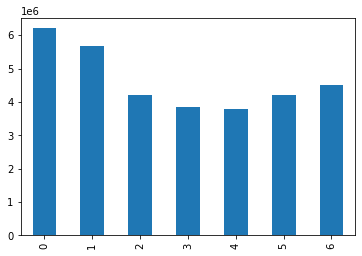

In [8]:
bar_order_day = instacart_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

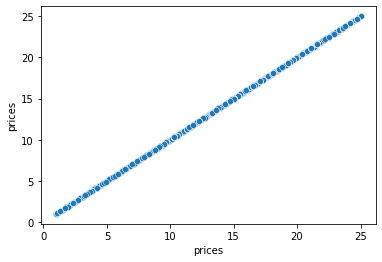

In [9]:
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = instacart_merged)

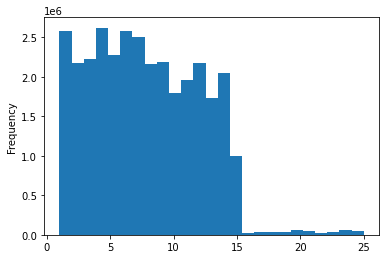

In [10]:
hist_prices_bin25 = instacart_merged['prices'].plot.hist(bins=25)

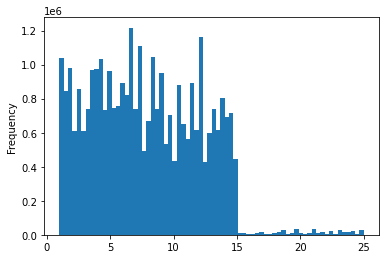

In [11]:
hist_prices_bin70 = instacart_merged['prices'].plot.hist(bins=70)

In [12]:
#Preparing data for sampling
np.random.seed(4)
dev = np.random.rand(len(instacart_merged)) <= 0.7

In [13]:
# creating a subset containing 70% of the original dataframe
big = instacart_merged[dev]

In [14]:
# creating a subset with 30% of the original dataframe
small = instacart_merged[~dev]

In [15]:
# creating a subset for the analysis based on the small sample
df_2 = small[['orders_day_of_week','prices']]

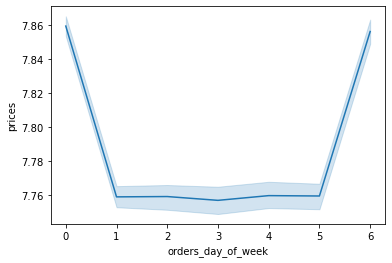

In [16]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

    In a markdown cell beneath your histogram, describe what the histogram demonstrates.


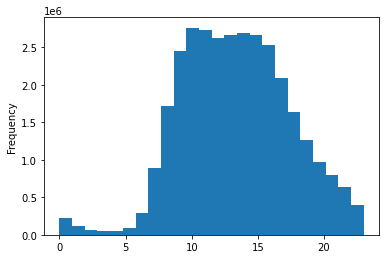

In [17]:
hist_order_hour = instacart_merged['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows the number of items ordered per hour of the day. 
The mornng from 0am to 5am is when the least items are ordered (< 500.000 items per hour).
In the time from 5am to 9am the ordered items increase, while they reach a peak at 9am (> 2.5 millions) and stay at a high level until 4pm (still above 2.5 millions).
After that the number of items ordered gradually decreases until there are less than 500.000 items per hour ordered after 11pm. 

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

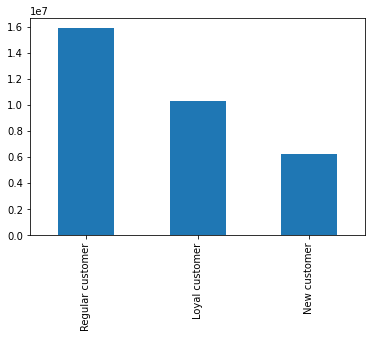

In [18]:
bar_loyalty_flag = instacart_merged['loyalty_flag'].value_counts().plot.bar()

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [19]:
# creating a subset for the analysis based on the small sample
df3 = small[['order_hour_of_day', 'prices']]

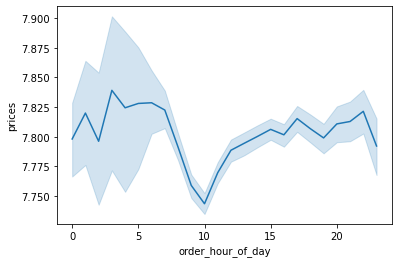

In [20]:
line_order_hour_prices = sns.lineplot(data = df3, x = 'order_hour_of_day', y = 'prices')

The average prices range from 7.75 to 7.85 dollars in the sample. While it appears that the average price is the lowest at 10am, there price difference, however, to me its not significant as the difference is just a little over 1%. 

6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:

    In a markdown cell beneath your line chart, describe what the line chart shows.


In [21]:
# creating a subset for the analysis based on the small sample
df4 = small[['age','n_dependants']]

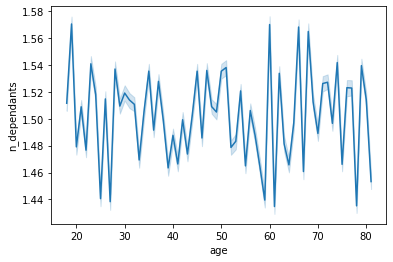

In [22]:
line_age_dependents = sns.lineplot(data = df4, x = 'age', y = 'n_dependants')

Based on the insights gained from the graph there is not connection between age and number of dependents.
The average number of dependants ranges from 1.44 to 1.58, so most of the customers have 1 or 2 dependants on average.

7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

    In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


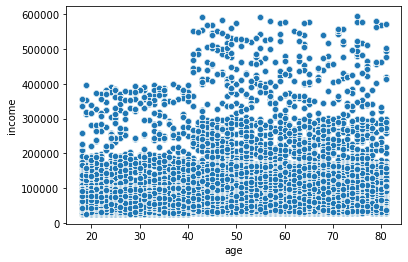

In [23]:
scatterplot_age_income = sns.scatterplot(x = 'age', y= 'income', data = instacart_merged)

The scatterplot shows that for the age group 18 - ~40 the most customers income ranges up to 200.000 dollars, while some customers have have an income of up to 400.000 dollars.
This changes starting after the age of 40 where the income range extends to 300.000 dollars for most customers, this continues for the maximum incomes that range up to ~600.000 dollars.

8. Export your visualizations as “.png” files in your relevant project folder.

In [24]:
bar_order_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_day.png'))

In [25]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_prices.png'))

In [26]:
hist_prices_bin25.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_bin25.png'))

In [27]:
hist_prices_bin70.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_bin70.png'))

In [28]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'linechart_order_day_prices.png'))

In [29]:
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour.png'))

In [30]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flags.png'))

In [31]:
line_order_hour_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_prices.png'))

In [32]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

In [35]:
instacart_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_w_visuals_49.pkl'))